In [38]:
from importlib import reload
import ananke.models.collection
from ananke.models.collection import Collection
reload(ananke.models.collection)
import ananke.models.collection
from ananke.configurations.collection import MergeConfiguration
from ananke.schemas.event import RecordType
from ananke.configurations.events import EventRedistributionMode
from ananke.configurations.collection import HDF5StorageConfiguration
import cProfile
import pstats
import matplotlib.pyplot as plt
import os
import logging
import Trigger_Improve as ti
import numpy as np
# Configure logging to display DEBUG messages
logging.basicConfig(level=logging.INFO)

In [39]:
path='data/LargeCMerge/10000s/1.h5'

In [40]:
in_collection=[]
for i in range(10):

    in_collection.append({'type': 'hdf5',
      'data_path': f'data/LargeCascades/{i}.h5',
      'read_only': 'False'})
    
in_collection.append({'type': 'hdf5',
  'data_path': f'data/LargeElectrical/1000.h5',
  'read_only': 'False'})
in_collection.append({'type': 'hdf5',
  'data_path': f'data/LargeBio/1000.h5',
  'read_only': 'False'})
x={
        'in_collections': in_collection,
        'out_collection': {
                'type': 'hdf5',
                'data_path': 'data/LargeCMerge/1000s.h5',
                'read_only':'False',
        },
        'content': [
            {
                'primary_type': RecordType.CASCADE.value,
                'secondary_types': [RecordType.ELECTRICAL.value,RecordType.BIOLUMINESCENCE],
                'number_of_records': 1,
                'interval': {
                    'start': 0,
                    'end': 1000000,
                }
            },
        ],
           
     }
x

{'in_collections': [{'type': 'hdf5',
   'data_path': 'data/LargeCascades/0.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/1.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/2.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/3.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/4.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/5.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/6.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/7.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/8.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeCascades/9.h5',
   'read_only': 'False'},
  {'type': 'hdf5',
   'data_path': 'data/LargeElectrical/1000.h5',
   'read_only': 'False'},
  {'type'

In [80]:
configuration = MergeConfiguration.parse_obj(x)

In [81]:
C=Collection.from_merge(configuration) #150C10k 37m #150C1k 35m 

INFO:root:Starting to merge collections with config.
INFO:root:Starting to create joined temporary collection.
100it [00:15,  6.45it/s]              
INFO:Collection:Starting to append collection.
100it [00:14,  7.01it/s]              
INFO:Collection:Finished to append collection.
INFO:Collection:Starting to append collection.
100it [00:13,  7.27it/s]              
INFO:Collection:Finished to append collection.
INFO:Collection:Starting to append collection.
100it [00:09, 10.82it/s]              
INFO:Collection:Finished to append collection.
INFO:Collection:Starting to append collection.
100it [00:53,  1.87it/s]              
INFO:Collection:Finished to append collection.
INFO:Collection:Starting to append collection.
100it [00:32,  3.04it/s]              
INFO:Collection:Finished to append collection.
INFO:Collection:Starting to append collection.
100it [00:39,  2.55it/s]              
INFO:Collection:Finished to append collection.
INFO:Collection:Starting to append collection.
100it

In [ ]:
result=ti.main(path='data/LargeCMerge/1000s.h5',CL=0,plot=True)

In [108]:
path='data/LargeCMerge/1000s.h5'

In [20]:
con=HDF5StorageConfiguration(data_path=path,read_only=False)
C=Collection(con)

In [32]:
path='data/LargeCascades/20records/'
files=[file for file in os.listdir(path) if len(file)<8]

files.sort()

for index in [1]:
    #start=time.time()
    in_col=[]
    random_files=files
    for file in random_files:
        dictionary={
                    'type': 'hdf5',
                    'data_path':path+file,
                    'read_only':'False',
                }
        in_col.append(dictionary)
    EL={
        'type': 'hdf5',
        'data_path': '../LargeElectrical/1000000.h5',
        'read_only':'False',
    }
    Bio={
        'type': 'hdf5',
        'data_path': '../LargeBio/1000000.h5',
        'read_only':'False',
    }
    in_col+=[EL,Bio]

    configuration = MergeConfiguration.parse_obj(
    {
          'in_collections': in_col,
            'out_collection': {
                    'type': 'hdf5',
                    'data_path':f'1000000s/{index}.h5',
                    'read_only':'False',

            },
            'content': [
                {
                    'primary_type': RecordType.CASCADE.value,
                    'secondary_types': [RecordType.ELECTRICAL.value,RecordType.BIOLUMINESCENCE.value],
                    'number_of_records': index*20,
                    'interval': {
                        'start': 5000,
                        'end': 10000,
                    }
                },
            ],
            'redistribution': {
                'interval': {
                    'start': 5000,
                    'end': 10000
                },
                'mode': EventRedistributionMode.CONTAINS_EVENT,
            }

         })

In [36]:
configuration.redistribution

RedistributionConfiguration(interval=Interval(start=5000.0, end=10000.0), mode=<EventRedistributionMode.CONTAINS_EVENT: 'contains_event'>, seed=300, percentile=0.5)

In [37]:
with C:    
    C.redistribute(configuration.redistribution)

INFO:Collection:Starting to redistribute with mode: contains_event
100%|██████████| 20/20 [1:30:53<00:00, 272.66s/it]
INFO:Collection:Finished to redistribute with mode: contains_event


In [30]:
with C:
    records=C.storage.get_records()
    r1=records.df.sort_values(by=['energy'])
    hits=C.storage.get_hits(record_ids=r1['record_id'][:9])

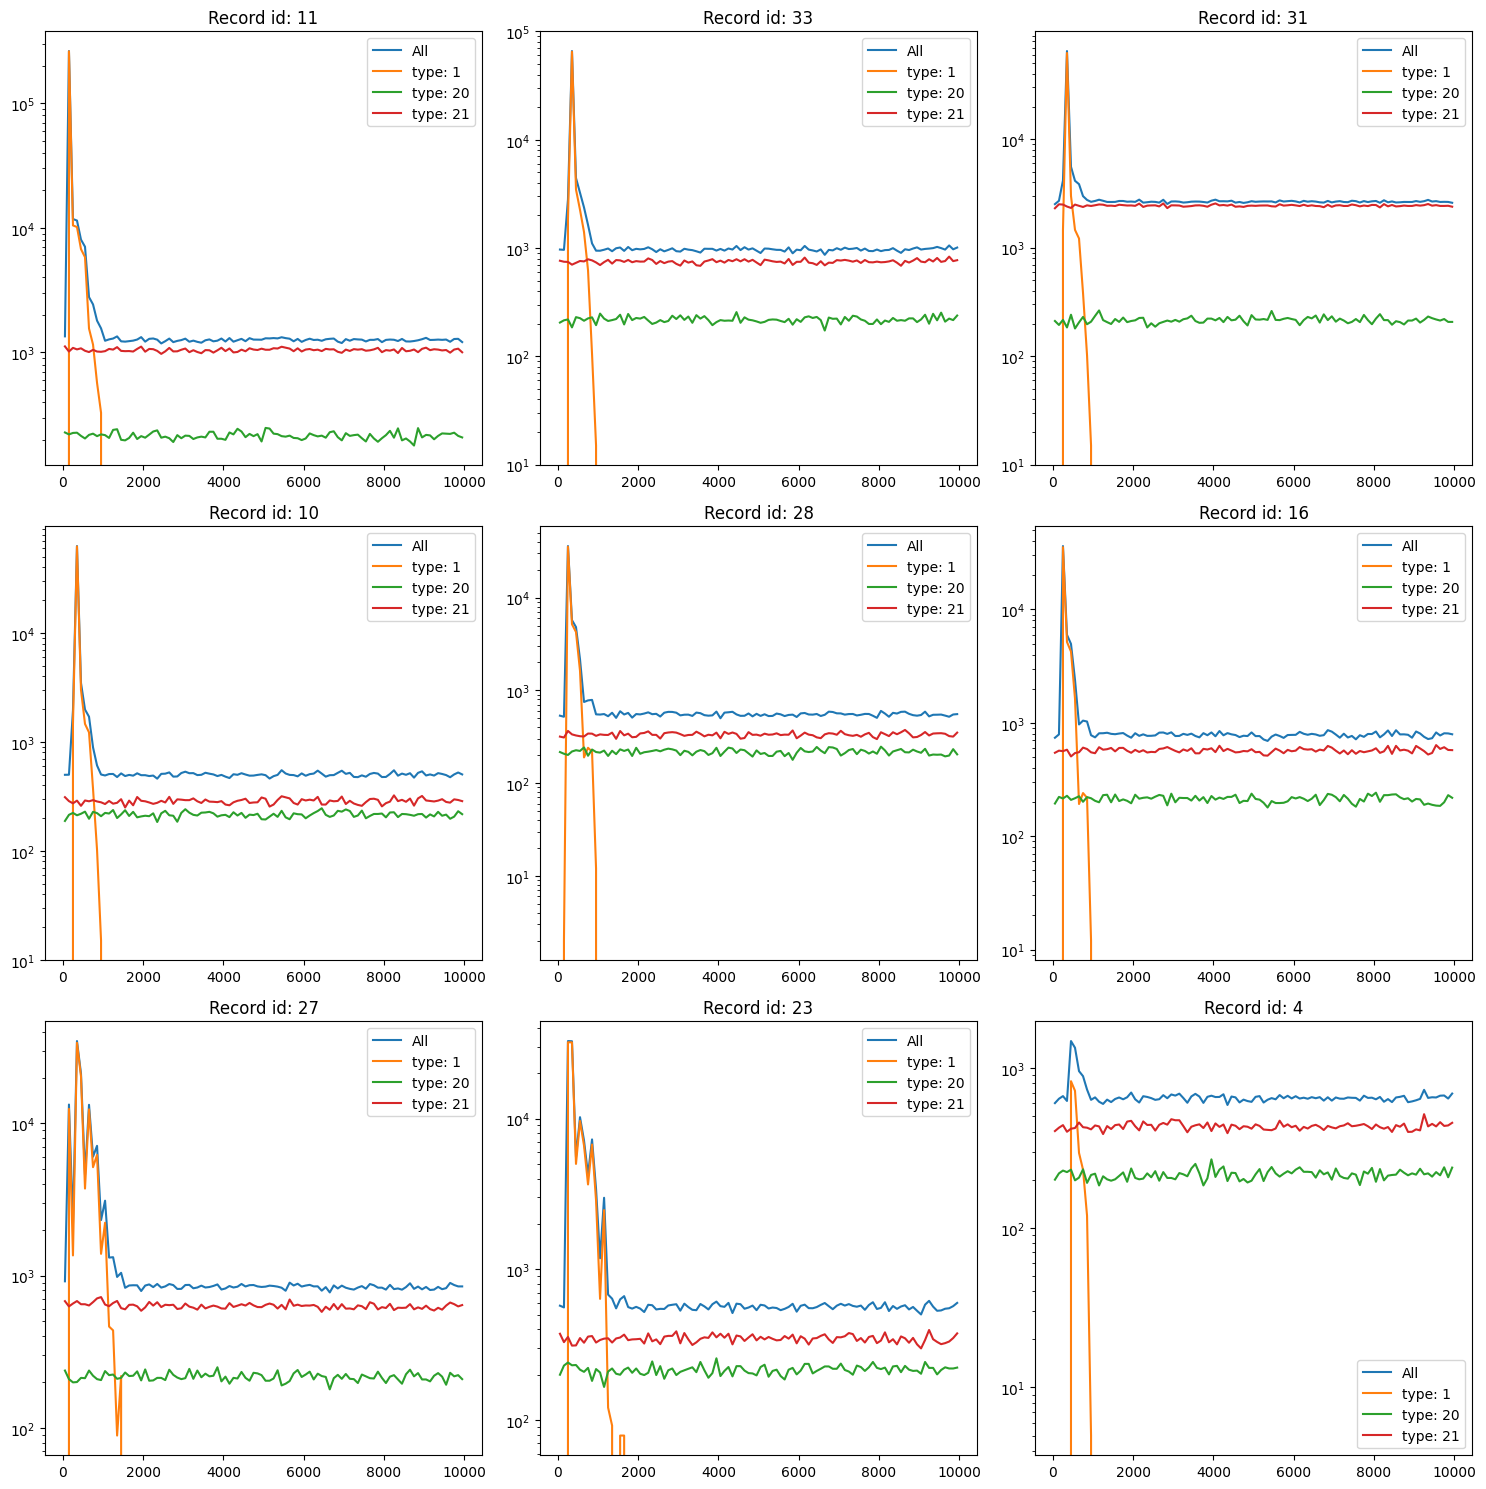

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for ax, record in zip(axes.flat,r1['record_id'][:9]):
    
    hit=hits.get_by_record_ids(record)
    t_all=hit.df['time']
    t_1=hit.df[hit.df['type']==1]['time']
    t_20=hit.df[hit.df['type']==20]['time']
    t_21=hit.df[hit.df['type']==21]['time']

    bins=np.arange(0,10001,100)
    t_all_h,intervals=np.histogram(t_all,bins=bins)
    t_1_h,intervals=np.histogram(t_1,bins=bins)
    t_20_h,intervals=np.histogram(t_20,bins=bins)
    t_21_h,intervals=np.histogram(t_21,bins=bins)

    interval=(intervals[1:]+intervals[:-1])/2

    ax.plot(interval,t_all_h,label='All')
    ax.plot(interval,t_1_h,label='type: 1')
    ax.plot(interval,t_20_h,label='type: 20')
    ax.plot(interval,t_21_h,label='type: 21')
    ax.set_title(f"Record id: {record}")
    ax.legend()
    #ax.set_xscale('log')
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

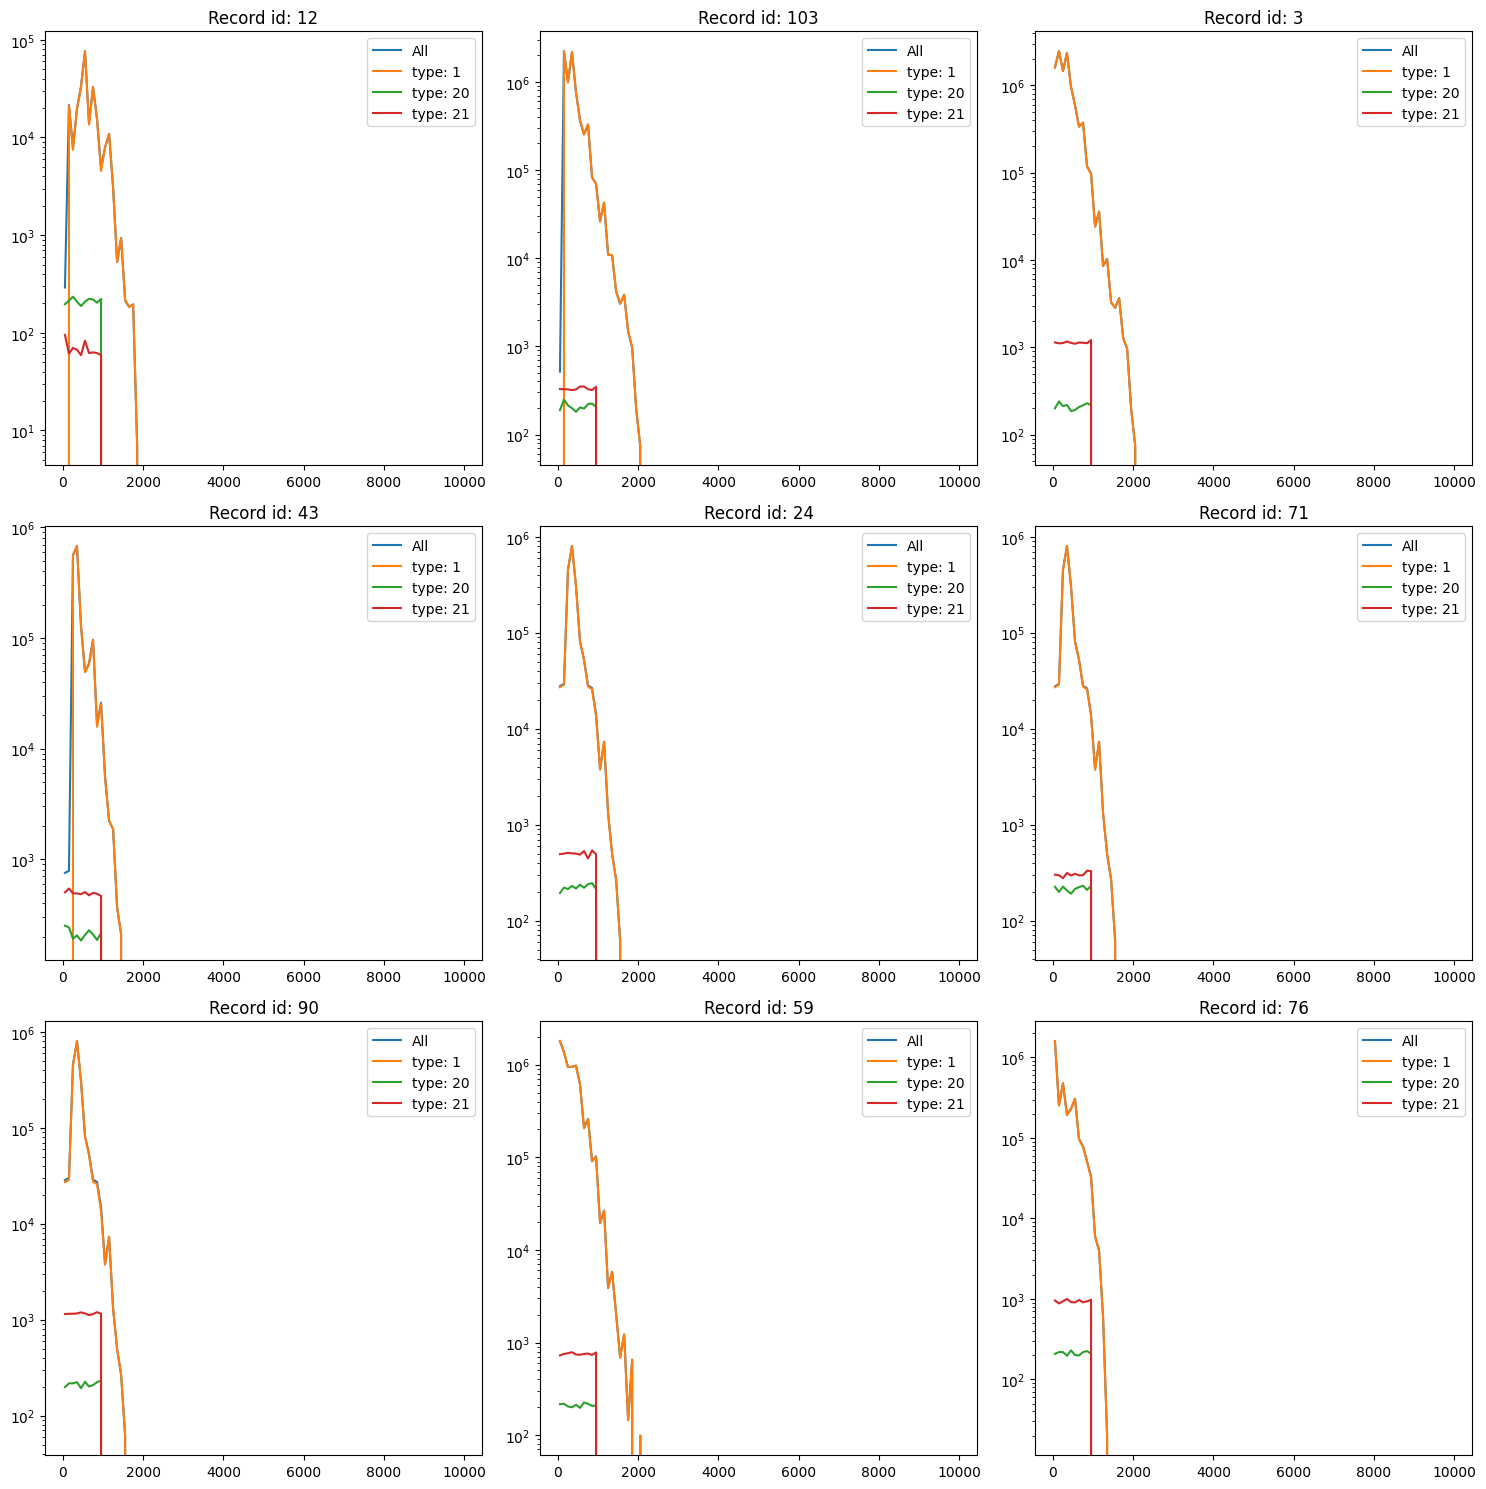

In [112]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for ax, record in zip(axes.flat,r1['record_id'][:9]):
    
    hit=hits.get_by_record_ids(record)
    t_all=hit.df['time']
    t_1=hit.df[hit.df['type']==1]['time']
    t_20=hit.df[hit.df['type']==20]['time']
    t_21=hit.df[hit.df['type']==21]['time']

    bins=np.arange(0,10001,100)
    t_all_h,intervals=np.histogram(t_all,bins=bins)
    t_1_h,intervals=np.histogram(t_1,bins=bins)
    t_20_h,intervals=np.histogram(t_20,bins=bins)
    t_21_h,intervals=np.histogram(t_21,bins=bins)

    interval=(intervals[1:]+intervals[:-1])/2

    ax.plot(interval,t_all_h,label='All')
    ax.plot(interval,t_1_h,label='type: 1')
    ax.plot(interval,t_20_h,label='type: 20')
    ax.plot(interval,t_21_h,label='type: 21')
    ax.set_title(f"Record id: {record}")
    ax.legend()
    #ax.set_xscale('log')
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
path=f'data/LargeCascades/'
energy=np.array([])
hits=np.array([])
for i in x:
    con=HDF5StorageConfiguration(data_path=path+i,read_only=False)
    C=Collection(con)
    with C:
        stats=C.get_record_statistics()
    hits=np.append(hits,stats.df['hit_count'].to_numpy())
    energy=np.append(energy,stats.df['energy'].to_numpy())

In [127]:
from joblib import Parallel, delayed

In [ ]:
path=f'data/LargeCascades/'

def datacollection(path,i):
    try:
        con=HDF5StorageConfiguration(data_path=path+i,read_only=False)
        C=Collection(con)
        with C:
            stats=C.get_record_statistics()
        hits=stats.df['hit_count'].to_numpy()
        energy=stats.df['energy'].to_numpy()
        return hits, energy
    except:
        return 

results = Parallel(n_jobs=8, verbose=30)(delayed(datacollection)(path, i) for i in x)

# Unpack results
hits_list, energy_list = zip(*results)

# Now `hits_list` and `energy_list` contain the results for all files
print("Hits:", hits_list)
print("Energy:", energy_list)


In [134]:
results=[x for x in results if x is not None]

In [137]:
hits_list, energy_list = zip(*results)


In [143]:
hits=np.array(hits_list).flatten()
energy=np.array(energy_list).flatten()

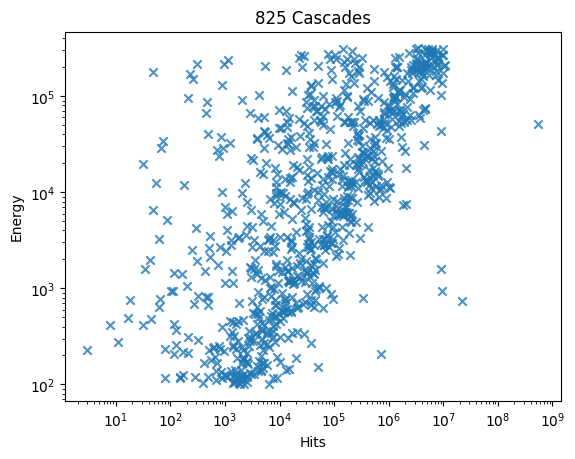

In [156]:
plt.scatter(hits,energy,marker='x',alpha=0.8)
plt.title(f'{hits.shape[0]} Cascades')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hits')
plt.ylabel('Energy')
plt.show()